# 4.10 Instacart Final Task

## Contents

### 1. Import libraries and data
### 2. Inspect data
#### 2.1 Show column headers and descriptive stats for merged data (active customers only)
#### 2.2 Explore departments
#### 2.3 Merge departments with orders data
### 3. Customer profiling
#### 3.1 Create customer profiles - marital status, age, dependents
#### 3.2 Distribution of customer profile types
##### 3.2.1 Descriptive statistics
###### 3.2.1.1 Usage frequency
###### 3.2.1.2 Expenditure
#### 3.3 Create new profiles - marital status only
##### 3.3.1 Explore marital status by region
##### 3.3.2 Product choice by marital status
##### 3.3.2.1 Explore produce sales by order timing and region
### 4. Compare customer profiles and brand loyalty
#### 4.1 Loyalty and frequency of ordering
#### 4.2 Frequent customer product preferences


# 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define project folder path
path = r'C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 4\12-2024 Instacart Basket Analysis'

In [3]:
# import project data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'completed_data_active_customers.pkl'))

In [4]:
# import project data
departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

   # 2. Inspect data

### Inspect merged data containing order, product, and customer information, filtered to active customers only

In [5]:
# view row count
df.shape

(30964564, 34)

In [6]:
# show columns in table
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'spending_flag', 'frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region', '_merge', 'activity_flag'],
      dtype='object')

In [7]:
# view first 10 rows
df.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,_merge,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
6,550135,1,7,1,9,20.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active


In [8]:
# describe dataset
df['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [9]:
# view the mean
df['prices'].mean()

7.790590247246368

In [10]:
# view the median
df['prices'].median()

7.4

In [11]:
# view the max
df['prices'].max()

25.0

In [12]:
# view data type of state column
df['state'].dtype

dtype('O')

### Explore departments data

In [13]:
# view department IDs
departments.columns

Index(['department_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

In [14]:
# Transpose and reset index
dept_transposed = departments.T.reset_index()
dept_transposed.columns = ['department_id', 'department_name']
dept_transposed = dept_transposed.iloc[1:].reset_index(drop=True)

In [15]:
# view sample of table rows
dept_transposed.head()

,department_id,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Merge departments with orders data

In [16]:
# Ensure department ID column is same data type in both tables
df['department_id'] = df['department_id'].astype(int)
dept_transposed['department_id'] = dept_transposed['department_id'].astype(int)

In [17]:
# Perform the join on 'department_id'
df = df.merge(dept_transposed, on='department_id')

In [18]:
# view sample of rows
df.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,n_dependants,fam_status,income,region,_merge,activity_flag,department_name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
6,550135,1,7,1,9,20.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both,Active,beverages


# 3. Customer profiling

## Create customer profiles

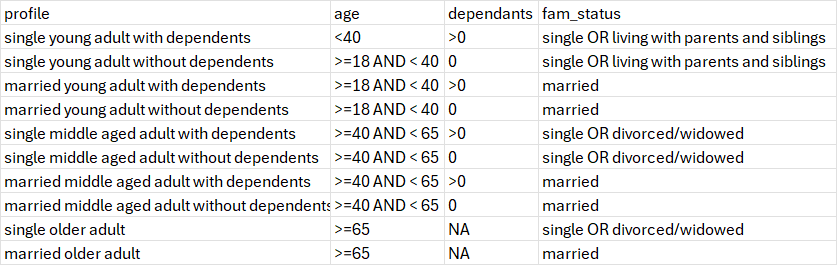

In [19]:
# check categories and frequency of family status
df['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [20]:
# check min age of users
df['age'].min()

18

In [21]:
# Create the 'profile' column with a default value
df['profile'] = "other"

In [22]:
# Define profiles

# Single young adult with dependents
df.loc[(df['age'] < 40) & (df['n_dependants'] > 0) & 
             (df['fam_status'].isin(['single', 'living with parents and siblings'])), 'profile'] = 'single young adult with dependents'

# Single young adult without dependents
df.loc[(df['age'] >= 18) & (df['age'] < 40) & (df['n_dependants'] == 0) & 
             (df['fam_status'].isin(['single', 'living with parents and siblings'])), 'profile'] = 'single young adult without dependents'

# Married young adult with dependents
df.loc[(df['age'] >= 18) & (df['age'] < 40) & (df['n_dependants'] > 0) & 
             (df['fam_status'] == 'married'), 'profile'] = 'married young adult with dependents'

# Married young adult without dependents
df.loc[(df['age'] >= 18) & (df['age'] < 40) & (df['n_dependants'] == 0) & 
             (df['fam_status'] == 'married'), 'profile'] = 'married young adult without dependents'

# Single middle aged adult with dependents
df.loc[(df['age'] >= 40) & (df['age'] < 65) & (df['n_dependants'] > 0) & 
             (df['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single middle aged adult with dependents'

# Single middle aged adult without dependents
df.loc[(df['age'] >= 40) & (df['age'] < 65) & (df['n_dependants'] == 0) & 
             (df['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single middle aged adult without dependents'

# Married middle aged adult with dependents
df.loc[(df['age'] >= 40) & (df['age'] < 65) & (df['n_dependants'] > 0) & 
             (df['fam_status'] == 'married'), 'profile'] = 'married middle aged adult with dependents'

# Married middle aged adult without df
df.loc[(df['age'] >= 40) & (df['age'] < 65) & (df['n_dependants'] == 0) & 
             (df['fam_status'] == 'married'), 'profile'] = 'married middle aged adult without dependents'

# Single older adult
df.loc[(df['age'] >= 65) & 
             (df['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single older adult'

# Married older adult
df.loc[(df['age'] >= 65) & (df['fam_status'] == 'married'), 'profile'] = 'married older adult'


## Distribution of customer profile types

In [23]:
# view frequency distribution of profile types as table
df['profile'].value_counts()

married middle aged adult with dependents      9046762
married young adult with dependents            6523363
married older adult                            6173586
single middle aged adult without dependents    3057148
single young adult without dependents          2660575
single older adult                             2021958
single young adult with dependents             1481172
Name: profile, dtype: int64

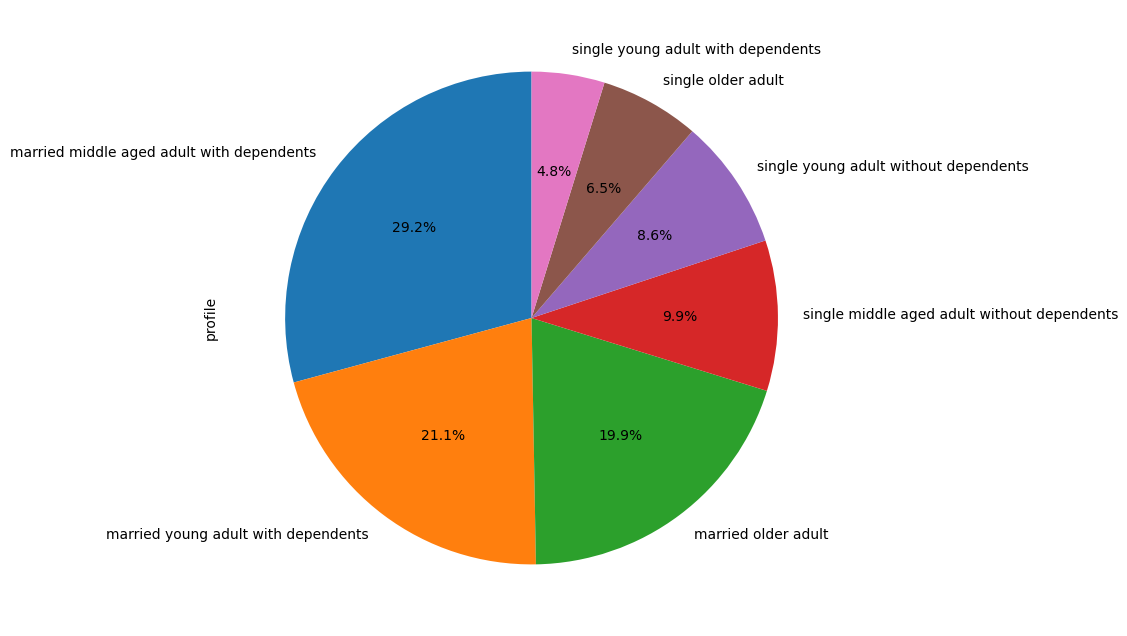

In [24]:
# view frequency distribution of profile types as pie chart
demographic_profile_chart = df['profile'].value_counts().plot.pie(
                                    autopct='%1.1f%%',  # Display percentages on the chart
                                    startangle=90,      # Start the pie chart at a specific angle
                                    figsize=(8, 8),     # Adjust the figure size
                                    legend=False        # Disable the legend
                                )

In [25]:
# Save the chart as a JPG
demographic_profile_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_dem_prof.jpg'))

##### Three customer profiles dominate ordering - married young adult with dependents, married middle aged adult with dependents, and married older adult. Marital status is the commonality between the categories and merits further analysis independent of the other demographic characteristics in next section, after exploring descriptive statistics for the current profiles.

### Descriptive statistics: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Usage frequency

In [26]:
#Group by 'profile' and find the maximum order value
df.groupby('profile')['max_order'].max()

profile
married middle aged adult with dependents      99
married older adult                            99
married young adult with dependents            99
single middle aged adult without dependents    99
single older adult                             99
single young adult with dependents             99
single young adult without dependents          99
Name: max_order, dtype: int64

In [27]:
#Group by 'profile' and find the maximum order value
df.groupby('profile')['max_order'].mean().round()

profile
married middle aged adult with dependents      34.0
married older adult                            34.0
married young adult with dependents            35.0
single middle aged adult without dependents    35.0
single older adult                             34.0
single young adult with dependents             35.0
single young adult without dependents          34.0
Name: max_order, dtype: float64

In [28]:
#Group by 'profile' and find the maximum order value
df.groupby('profile')['max_order'].min()

profile
married middle aged adult with dependents      5
married older adult                            5
married young adult with dependents            5
single middle aged adult without dependents    5
single older adult                             5
single young adult with dependents             5
single young adult without dependents          5
Name: max_order, dtype: int64

#### Expenditure

In [29]:
#Group by 'profile' and find the expenditure value
df.groupby('profile')['spending'].max().round(2)

profile
married middle aged adult with dependents       6983.59
married older adult                             7414.49
married young adult with dependents             5271.14
single middle aged adult without dependents    15006.94
single older adult                             14042.51
single young adult with dependents             10209.99
single young adult without dependents           8794.88
Name: spending, dtype: float64

In [30]:
#Group by 'profile' and find the expenditure value
df.groupby('profile')['spending'].mean().round(2)

profile
married middle aged adult with dependents      11.82
married older adult                            11.68
married young adult with dependents            12.38
single middle aged adult without dependents    12.33
single older adult                             12.01
single young adult with dependents             10.89
single young adult without dependents          11.91
Name: spending, dtype: float64

In [31]:
#Group by 'profile' and find the expenditure value
df.groupby('profile')['spending'].min().round(2)

profile
married middle aged adult with dependents      1.50
married older adult                            1.26
married young adult with dependents            1.00
single middle aged adult without dependents    1.00
single older adult                             1.31
single young adult with dependents             2.13
single young adult without dependents          1.80
Name: spending, dtype: float64

## Create new profile - marital status

#### Create boolean flag for marital status

In [32]:
# Create the boolean flag with the new column name based on profile category
df.loc[:, 'marital_status'] = df['profile'].str.contains('married', case=False, na=False)


#### View the results of the new profile

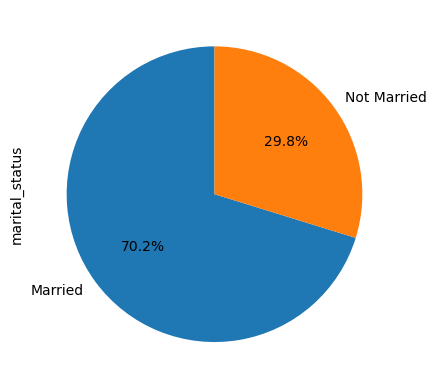

In [33]:
# create a pie chart of marital status
marital_status_chart = df['marital_status'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Format for percentages (1 decimal place)
    labels=['Married', 'Not Married'],  # Custom labels for the slices
    startangle=90,  # Rotate the pie chart for better alignment
    legend=False
)

In [34]:
# Save the chart as a JPG
marital_status_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_marital_status.jpg'))

##### 70% of Instacart orders were placed by a married customer. Further analysis of this category is performed in the following section, and may be helpful in determining the types of products and advertisement timing strategy.

### Explore marital status by region

In [35]:
# create a crosstab with region and marital status
regions_ct = pd.crosstab(
    index = df['region'],
    columns = df['marital_status']
)

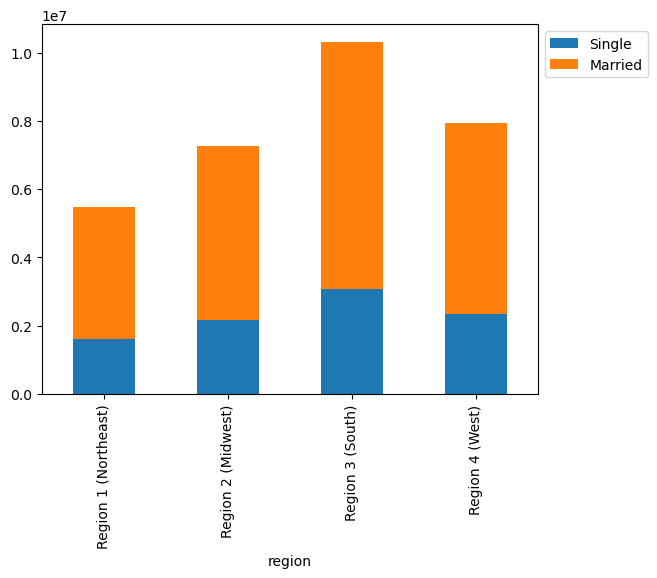

In [36]:
# create a stacked bar chart of the regions crosstab
regions_ct_chart = regions_ct.plot.bar(stacked=True)
regions_ct_chart.legend(
    ['Single', 'Married'],
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

In [75]:
# Save the chart as a JPG
regions_ct_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_mstatus.jpg'), bbox_inches='tight')

##### As seen above, there are no significant regional differences in the breakdown of orders by marital status. For all regions, marketing strategies can be similar for single and married customers.

### Product choice by marital status

In [38]:
# create crosstab with departments and profiles
department_ct = pd.crosstab(
    index = df['department_name'],
    columns = df['marital_status']
)

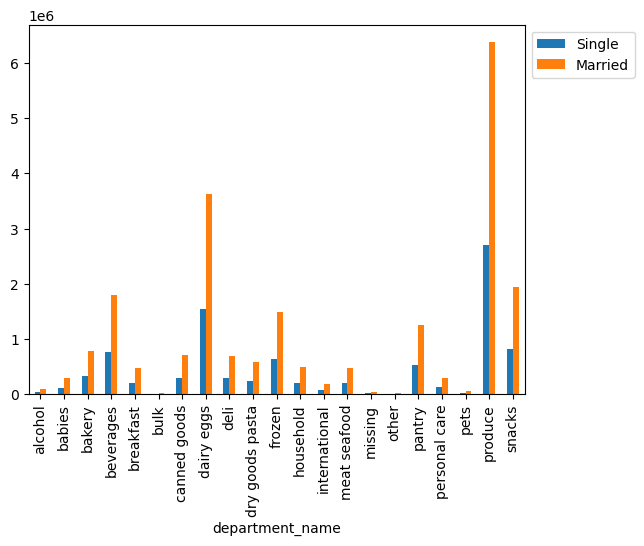

In [39]:
# view department cross tab as bar chart
department_ct_plot = department_ct.plot.bar(stacked=False)
department_ct_plot.legend(
    ['Single', 'Married'],
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

In [40]:
# Save the chart as a JPG
department_ct_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_ct.jpg'), bbox_inches='tight')

##### Produce, dairy/eggs, and beverages are the top three departments. Purchases by married users outnumber those by single users in all departments. As can be seen below, the percentage of purchases in each department made by married users is similar, ranging only from 68.7% to 71.2%.

#### Calculate percent of purchases by department for married versus single users

In [41]:
# Add percentage where marital_status = True
department_ct['percent_married'] = (department_ct[True] / department_ct.sum(axis=1)) * 100

In [42]:
# view department crosstab as table
department_ct

marital_status,False,True,percent_married
department_name,,,
alcohol,45206,99421,68.743042
babies,122709,287683,70.099563
bakery,335079,785749,70.104334
beverages,764448,1807453,70.276927
breakfast,199630,471220,70.242230
bulk,9633,23818,71.202655
canned goods,299497,712577,70.407599
dairy eggs,1544583,3632599,70.165565
deli,301501,702333,69.965054


In [43]:
department_ct['percent_married'].min()

68.74304244712259

In [44]:
department_ct['percent_married'].max()

71.20265462915907

##### Produce is a top seller for both married and single users. It may be useful to explore the timing of produce advertising specifically and regional differences.

### Explore produce orders

In [45]:
# Filter records for 'produce'
produce_df = df[df['department_name'] == 'produce']

### When is produce purchased (day of week and hour of day)?

#### Day of week

In [46]:
# generate a value count of orders for each day of the week
dow_counts = produce_df['order_day_of_week'].value_counts()

In [47]:
# Map numeric days to day names to make chart easier to understand
day_map = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Convert the index (numeric days) to day names
dow_counts = dow_counts.reset_index()  # Converts to DataFrame
dow_counts.columns = ['order_day_of_week', 'order_count']
dow_counts['day_name'] = dow_counts['order_day_of_week'].map(day_map)

In [48]:
# view day of week frequency counts as table
dow_counts

,order_day_of_week,order_count,day_name
0,0,1865181,Saturday
1,1,1612409,Sunday
2,6,1282339,Friday
3,2,1146996,Monday
4,5,1136699,Thursday
5,3,1024229,Tuesday
6,4,1011420,Wednesday


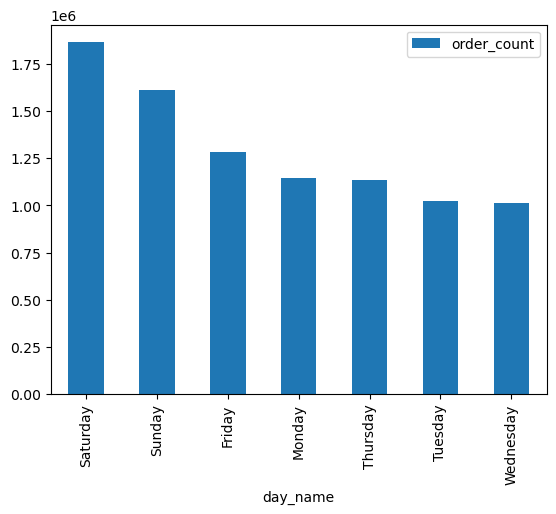

In [49]:
# view day of week frequency counts as bar chart
dow_counts_bar = dow_counts.plot.bar(x='day_name', y='order_count')

In [50]:
# Adjust layout
plt.tight_layout()

# Save the chart as a JPG
dow_counts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_counts.jpg'), bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#### Hour of day

In [51]:
# generate a value count of orders for each hour of the day
hod_counts = produce_df['order_hour_of_day'].value_counts()

In [52]:
# convert frequency table to dataframe
hod_counts = hod_counts.reset_index()
hod_counts.columns = ['order_hour_of_day', 'order_count']

In [53]:
# view hour of day frequency counts as table
hod_counts

,order_hour_of_day,order_count
0,10,769161
1,11,762072
2,14,752732
3,13,745178
4,15,741277
5,12,734100
6,16,701558
7,9,688956
8,17,565626
9,8,494234


In [54]:
# Sort by hour of day (x-axis) for visualization
hod_counts = hod_counts.sort_values(by='order_hour_of_day')

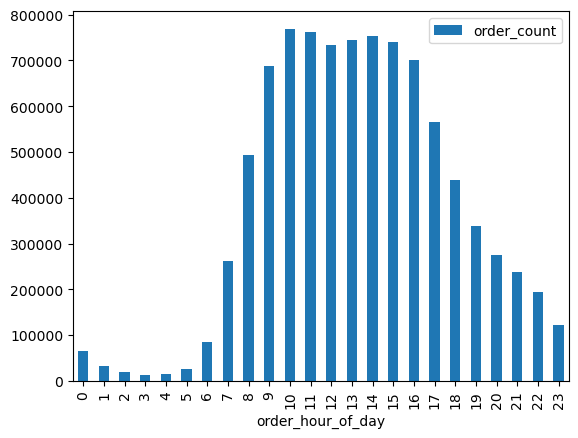

In [55]:
# view hour of day frequency counts as bar chart
hod_counts_bar = hod_counts.plot.bar(x='order_hour_of_day', y='order_count')

In [56]:
# Save the chart as a JPG
hod_counts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_counts.jpg'))

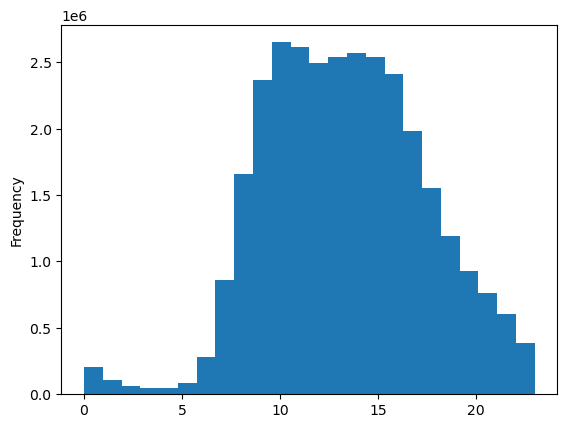

In [57]:
# create a histogram of prices column
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

### Are there differences in the timing of produce purchases for single users versus married users?

#### Day of week

In [58]:
# create crosstab of order day of week and marital status
dow_mstatus_ct = pd.crosstab(
    index = produce_df['order_day_of_week'],
    columns = produce_df['marital_status']
)

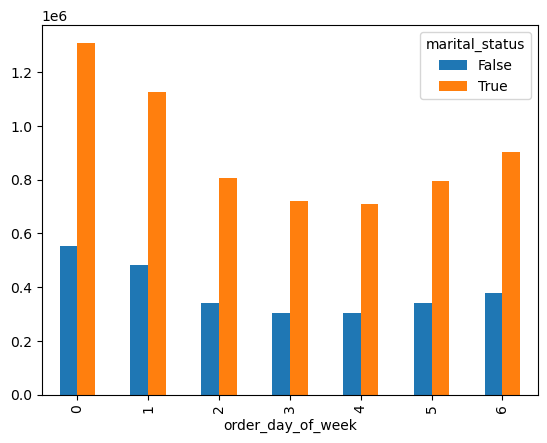

In [59]:
# view crosstab as bar chart
dow_mstatus_bar = dow_mstatus_ct.plot.bar(stacked=False)

In [60]:
# Save the chart as a JPG
dow_mstatus_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_mstatus.jpg'))

#### Hour of day

In [61]:
# create a crosstab of order hour of day and marital status
hod_mstatus_ct = pd.crosstab(
    index = produce_df['order_hour_of_day'],
    columns = produce_df['marital_status']
)

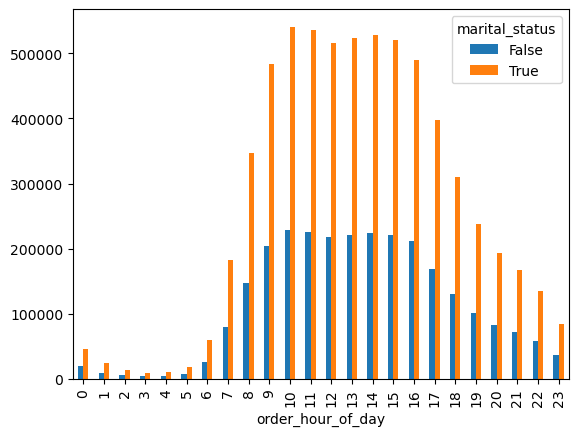

In [62]:
# view crosstab as bar chart
hod_mstatus_bar = hod_mstatus_ct.plot.bar(stacked=False)

In [63]:
# Save the chart as a JPG
hod_mstatus_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_mstatus.jpg'))

##### For both married and single users, the timing of produce purchases follows a similar pattern. The marketing strategy in regard to advertisement timing can be similar for both demographic groups.

### Are there regional differences in produce purchases?

In [64]:
# create a frequency table for produce order counts by region
region_produce_counts = produce_df['region'].value_counts()

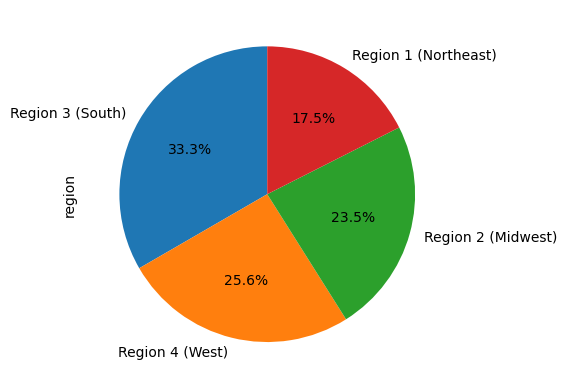

In [65]:
# plot regional value counts
region_produce_bar = region_produce_counts.plot.pie(
    autopct='%1.1f%%',  # Format for percentages (1 decimal place)
    startangle=90,  # Rotate the pie chart for better alignment
    legend=False
)

##### Produce sales are strongest in the South and weakest in the Northeast, consistent with total sales of all products.

In [66]:
# Save the chart as a JPG
region_produce_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_produce.jpg'))

# 4. Compare customer profiles and brand loyalty


### Loyalty and frequency of ordering

In [67]:
# show distribution of loyalty status
df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

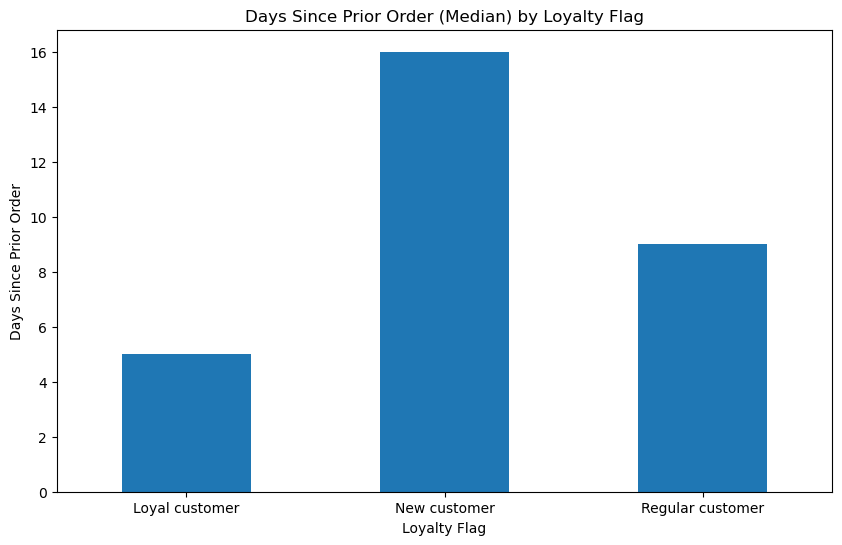

In [68]:
# analyze differences in ordering habits based on loyalty status

# Grouping and counting
grouped = df.groupby('loyalty_flag')['days_since_prior_order'].median()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Days Since Prior Order (Median) by Loyalty Flag')
plt.ylabel('Days Since Prior Order')
plt.xlabel('Loyalty Flag')
plt.xticks(rotation=0)
plt.show()

##### Note: Loyal customers have, on average, fewer days between their orders than regular or new customers, meaning that they are placing orders more frequently in addition to placing more orders overall. This can be further illustrated by comparing the loyalty status with the customer's frequency status, which is derived from the median of the days since prior order value. As can be seen below, all loyal customers are also frequent customers.

In [69]:
# create crosstab of loyalty flag and frequency flag
freq_loyalty_ct = pd.crosstab(
    index = df['loyalty_flag'],
    columns = df['frequency_flag']
)

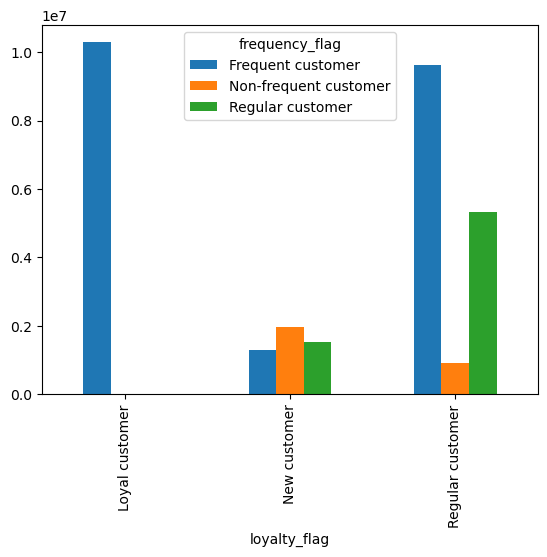

In [70]:
# view crosstab as bar chart
freq_loyalty_bar = freq_loyalty_ct.plot.bar()

In [71]:
# Save the chart as a JPG
freq_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_loyalty.jpg'), bbox_inches='tight')

### Frequent customer product preferences

In [72]:
# create crosstab with department and frequency flag
freq_dept_ct = pd.crosstab(
    index = df['department_name'],
    columns = df['frequency_flag']
)

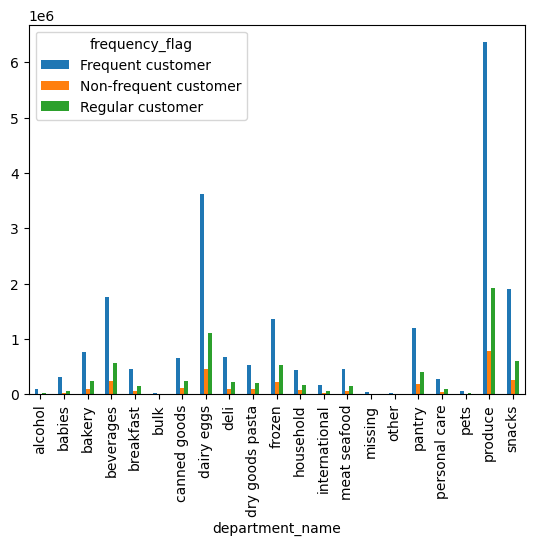

In [73]:
# view crosstab as bar chart
freq_dept_bar = freq_dept_ct.plot.bar()

In [74]:
# Save the chart as a JPG
freq_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_dept.jpg'), bbox_inches='tight')

##### Customers who make frequent orders favor certain product types, like fresh items (produce, dairy/eggs). This makes good sense, since these items have a shorter shelf life and often require cold storage. It might be beneficial to advertise perishable items such as fresh produce and milk to those customers who order frequently. Non-frequent and regular customers may also be targeted with advertisements for these items, as building a habit of purchasing perishables may increase their ordering frequency. Loyal, frequent customers may appreciate advertisements for sales of items in these departments.